# Tweepy Stream Example

In this example we use the twitter api and tweepy to collect tweets based on a hash tag, cleans the text data, and organizes the data into a data frame with labels.

## Install Modules  
Note you will need to use tweepy v 3.7 for this example. Regular Expressions, re, and CountVectorizer are used to text cleaning and vectorization. 

In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
#pip install tweepy==3.7
from tweepy import OAuthHandler
import json
from tweepy import Stream
#from tweepy.streaming import StreamListener
import re
from sklearn.feature_extraction.text import CountVectorizer

## Connect to twitter

You need a Twitter Developer Acct and associated access codes to access the Twitter API. See the developer portal at twitter. For this version, you will need a consumer key, consumer secret, access token, and access secret. I store my passcodes in a local text file.

In [2]:
## All 4 keys are in my TwitterCodesFile.txt and are comma sep
filename="C://Users//jerem//Google Drive//Online//iCuse//IST736//IST736repo2//codeShare//profB//TwitterCodesFile.txt"
with open(filename, "r") as FILE:
    keys=[i for line in FILE for i in line.split(',')]
   
#API Key:
consumer_key = keys[0]
#API Secret Key:
consumer_secret =keys[1]
#Access Token:
access_token =keys[2]
#Access Token Secret:
access_secret =keys[3]


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

### Stream Listener

Tweepy has a listener class that allows you to collect "streaming" tweets. To set the parameters for this class, it is best to subclass / extend. See below.

In [3]:
 
class Listener(tweepy.StreamListener):
    print("In Listener...")
    tweet_number=0
    #__init__ runs as soon as an instance of the class is created
    def __init__(self, max_tweets, hfilename, rawfile, TweetsList, LabelsList, nohashname):
        self.max_tweets=max_tweets
        print(self.max_tweets)    
    #on_data() is a function of StreamListener as is on_error and on_status    
    def on_data(self, data):
        self.tweet_number+=1
        #print("In on_data", self.tweet_number)
        try:
            #print("In on_data in try")
            with open(hfilename, 'a') as f:
                with open(rawfile, 'a') as g:
                    tweet=json.loads(data)
                    ## RE: https://realpython.com/python-json/
                    tweet_text=tweet["text"]
                    #print(tweet_text,"\n")
                    TweetsList.append(tweet_text)
                    LabelsList.append(nohashname)
                    #print(TweetsList)
                    f.write(tweet_text) # the text from the tweet
                    json.dump(tweet, g)  #write the raw tweet
        except BaseException:
            #print("NOPE")
            pass
        if self.tweet_number>=self.max_tweets:
            #sys.exit('Limit of '+str(self.max_tweets)+' tweets reached.')
            print("Got ", str(self.max_tweets), "tweets.")
            return False
    #method for on_error()
    def on_error(self, status):
        print("ERROR")#machi
        print(status)   #401 your keys are not working
        if(status==420):
            print("Error ", status, "rate limited")
            return False
#----------------end of class Listener


In Listener...


# Let the fun begin!

We will gather tweets based on 3 different hashtags (which will be used as labels for classification purposes / analyses)

In [4]:
label1 = 'cat'
label2 = 'dog'

Hashes = [label1, label2]    
numtweets= 50  ## you can change this number!
CompleteTweetList=[]
CompleteLabelsList=[]


for hashname in Hashes:  
   
    ##########################################################
    ## The commented out lines can be integrated if you want
    ## the USER to enter the hashname and the number of tweets
    ## to get:
    #hashname=input("Enter the hash name, such as #womensrights: ")
    #numtweets=eval(input("How many tweets do you want to get?: "))
   
    # if(hashname[0]=="#"):
    #     nohashname=hashname[1:] #remove the hash
    # else:
    #     nohashname=hashname
    #     hashname="#"+hashname
    ##############################################################
   
    print("getting....", hashname,"\n")
   
    nohashname=hashname
    hashname="#"+hashname
    #Create a file for any hash name    
    hfilename="file_"+nohashname+".txt"
    ## FOr example, file_football.txt  if you used #football
    rawfile="file_rawtweets_"+nohashname+".txt"
    ## For example, file_rawtweets_football.txt
    ## Notice that the raw file is in json
    ## The hfilename is just text
    TweetsList=[]
    LabelsList=[]
   
    ################ Get the tweets..................................
    twitter_stream = Stream(auth, Listener(numtweets,
                                           hfilename, rawfile,
                                           TweetsList, LabelsList,
                                           nohashname))
    ## https://developer.twitter.com/en/docs/twitter-api/tweets/filtered-stream/introduction
    ## https://developer.twitter.com/en/docs/twitter-api/enterprise/powertrack-api/overview
    #twitter_stream.filter(track=['#womensrights'])
    twitter_stream.filter(track=[hashname], languages=["en"])
    ##..................................................................
   
    ## Save each Tweet in a list
    ## This will create a LIST OF CONTENT
    ## that you can use with CountVectorizer, etc.
   
    print(TweetsList)
    print(LabelsList)
   
    ## Add these to the complete lists
    ## extend (rather than append) will add the elements
    ## one by one to the existing list.
    CompleteTweetList.extend(TweetsList)
    CompleteLabelsList.extend(LabelsList)
   
   

######################## END OF LOOP #############################

getting.... cat 

50
Got  50 tweets.
['RT @sachikoko: 💛ADORABLE 3YO BEIGE &amp; WHITE KITTY "HUGO"💛\n😿CAME IN WITH SIBLINGS MARIO &amp; GRACO\n🔶NEEDS #ADOPTION OR #RESCUE🚕\n🔶ID 632908 Cage…', 'RT @Kairpra: #cats #CatsOfTwitter #catlovers #cat @LouDPhillips do your cats look at you like this, when you sit in their spot? https://t.c…', 'RT @sachikoko: 🙏🏽PLZ KEEP SHARING\n💖SWEET 1YO GRAY/BLUE KITTY SOLARA💖\n😿💔DUMPED BY OWNER\n📢STILL NEEDS #ADOPTION/#RESCUE ASAP\nID 632703-Solara…', '!!!!!!!!!NOT FOR EAT!!!!!!!!!!\n\n#cat #peta #art #procreate https://t.co/MiPjiYKEiC', 'RT @jonesiecat: Murder mittens activated…                     #ToeBeanTuesday #CalicoCrew                       #CatsOfTwitter #Cats #Cat h…', 'RT @greatstuffuneed: Vintage Signed #Gold  #Cat #Brooch Pin Lot JJ Cat with Fish Bowl, #Disney #Tigger,  #Leopard w Black Spots Kitten Feli…', 'Just for fun\n#swipe #swipeleft⬅️ #swipeleft \n\n#pencildrawing #pencilart #blackgirls #buttcrack #jeans #twerkgirls… https://t.co/sqZ7H3D8

## Raw Data Acquired!
Lets see what we collected!!

In [5]:
print(CompleteTweetList)
print(CompleteLabelsList)

['RT @sachikoko: 💛ADORABLE 3YO BEIGE &amp; WHITE KITTY "HUGO"💛\n😿CAME IN WITH SIBLINGS MARIO &amp; GRACO\n🔶NEEDS #ADOPTION OR #RESCUE🚕\n🔶ID 632908 Cage…', 'RT @Kairpra: #cats #CatsOfTwitter #catlovers #cat @LouDPhillips do your cats look at you like this, when you sit in their spot? https://t.c…', 'RT @sachikoko: 🙏🏽PLZ KEEP SHARING\n💖SWEET 1YO GRAY/BLUE KITTY SOLARA💖\n😿💔DUMPED BY OWNER\n📢STILL NEEDS #ADOPTION/#RESCUE ASAP\nID 632703-Solara…', '!!!!!!!!!NOT FOR EAT!!!!!!!!!!\n\n#cat #peta #art #procreate https://t.co/MiPjiYKEiC', 'RT @jonesiecat: Murder mittens activated…                     #ToeBeanTuesday #CalicoCrew                       #CatsOfTwitter #Cats #Cat h…', 'RT @greatstuffuneed: Vintage Signed #Gold  #Cat #Brooch Pin Lot JJ Cat with Fish Bowl, #Disney #Tigger,  #Leopard w Black Spots Kitten Feli…', 'Just for fun\n#swipe #swipeleft⬅️ #swipeleft \n\n#pencildrawing #pencilart #blackgirls #buttcrack #jeans #twerkgirls… https://t.co/sqZ7H3D8oY', 'Great project 🥰\n@royzkingin \n

# Basic EDA: WordCloud

Build a wordcloud for each class and identify high frequency distinguishing words. 

['RT @sachikoko: 💛ADORABLE 3YO BEIGE &amp; WHITE KITTY "HUGO"💛\n😿CAME IN WITH SIBLINGS MARIO &amp; GRACO\n🔶NEEDS #ADOPTION OR #RESCUE🚕\n🔶ID 632908 Cage…', 'RT @Kairpra: #cats #CatsOfTwitter #catlovers #cat @LouDPhillips do your cats look at you like this, when you sit in their spot? https://t.c…', 'RT @sachikoko: 🙏🏽PLZ KEEP SHARING\n💖SWEET 1YO GRAY/BLUE KITTY SOLARA💖\n😿💔DUMPED BY OWNER\n📢STILL NEEDS #ADOPTION/#RESCUE ASAP\nID 632703-Solara…', '!!!!!!!!!NOT FOR EAT!!!!!!!!!!\n\n#cat #peta #art #procreate https://t.co/MiPjiYKEiC', 'RT @jonesiecat: Murder mittens activated…                     #ToeBeanTuesday #CalicoCrew                       #CatsOfTwitter #Cats #Cat h…', 'RT @greatstuffuneed: Vintage Signed #Gold  #Cat #Brooch Pin Lot JJ Cat with Fish Bowl, #Disney #Tigger,  #Leopard w Black Spots Kitten Feli…', 'Just for fun\n#swipe #swipeleft⬅️ #swipeleft \n\n#pencildrawing #pencilart #blackgirls #buttcrack #jeans #twerkgirls… https://t.co/sqZ7H3D8oY', 'Great project 🥰\n@royzkingin \n

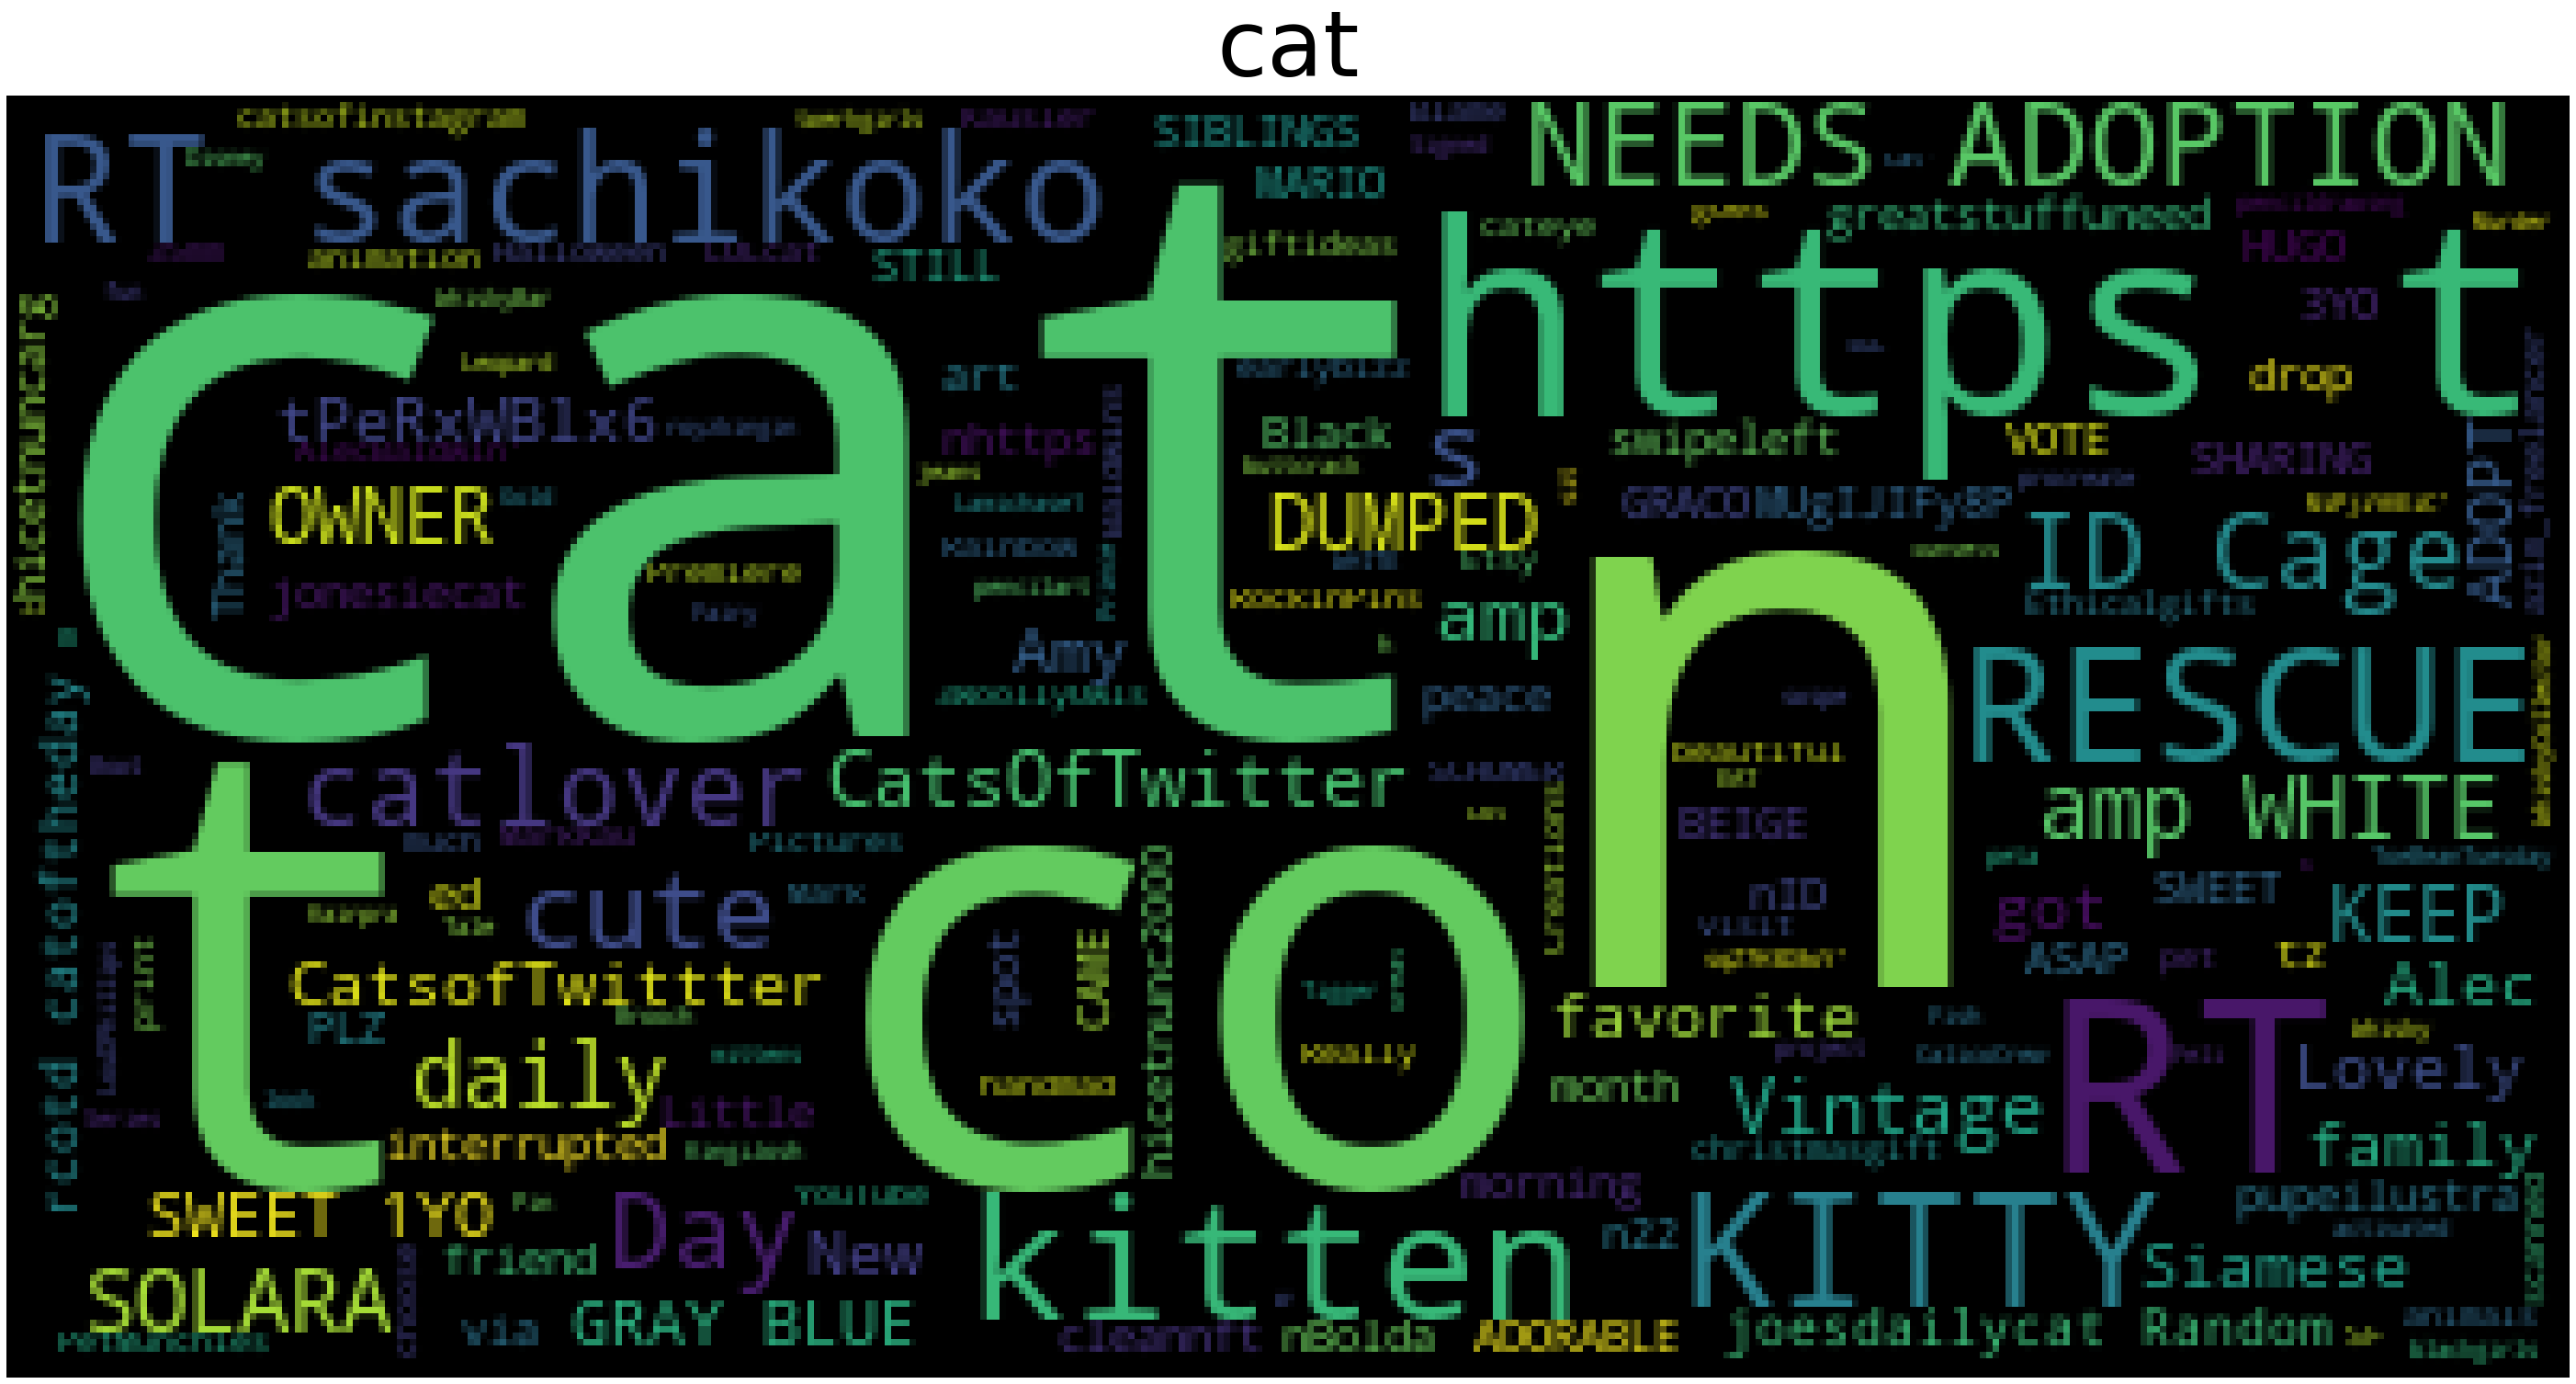

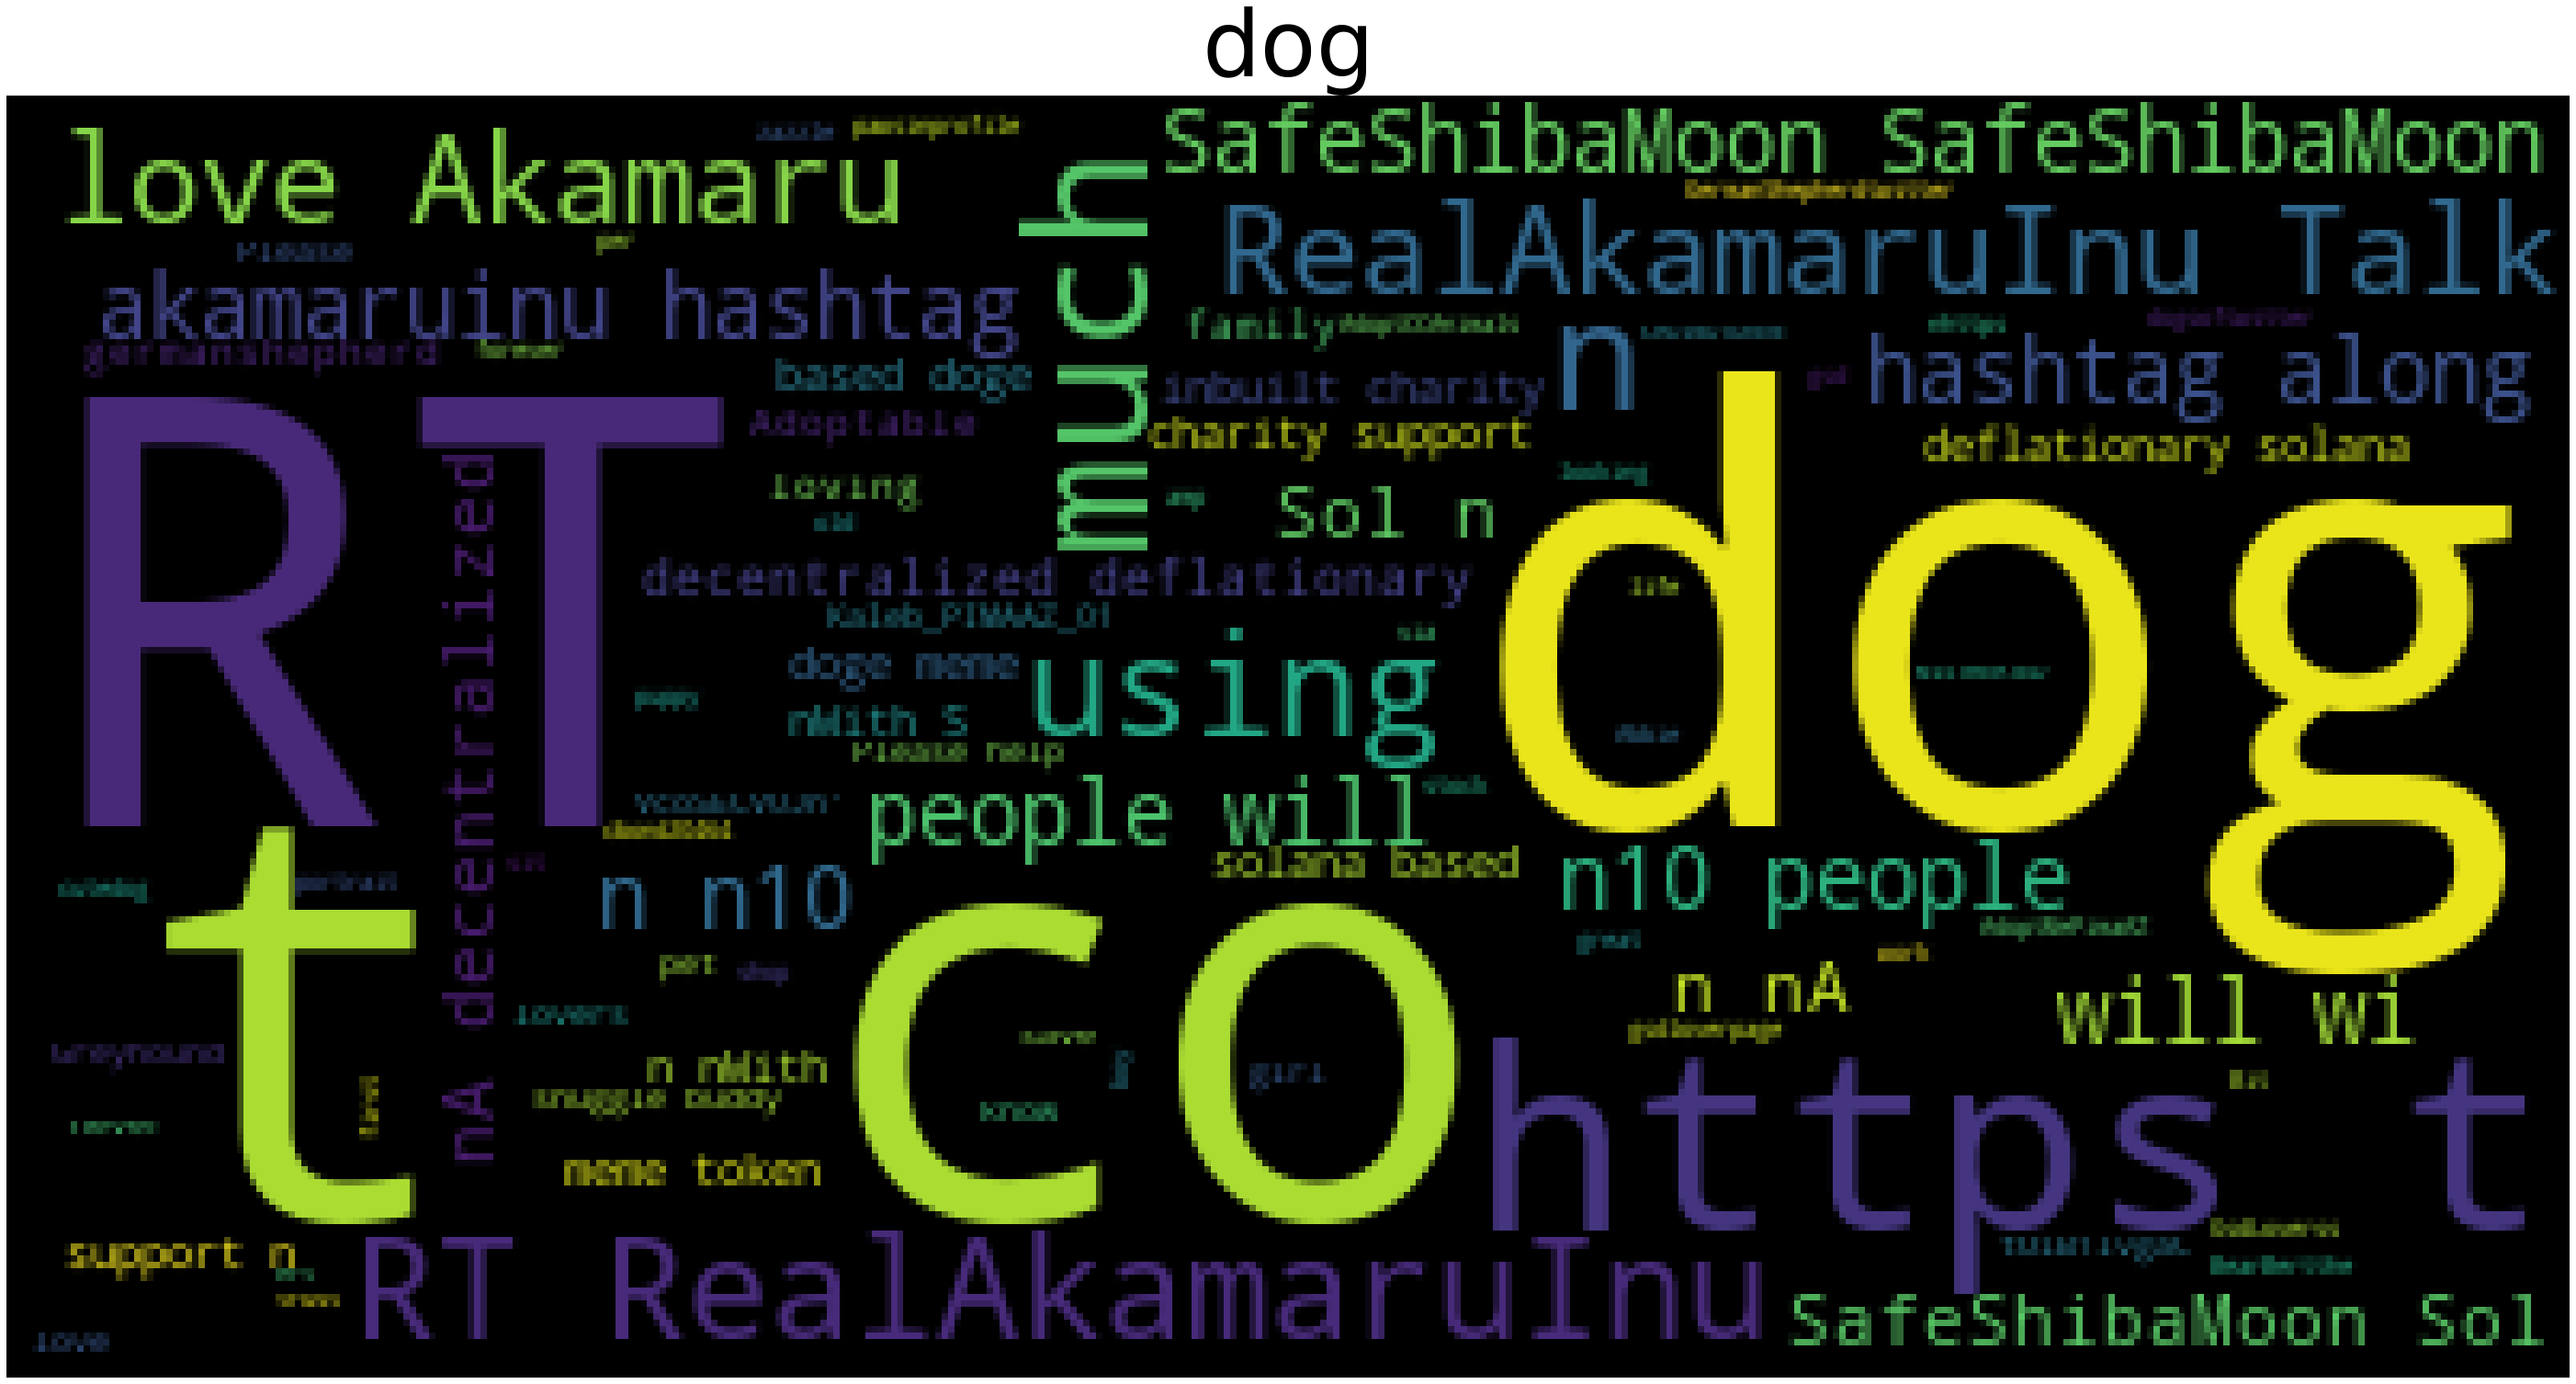

In [6]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS


ind1 = (pd.DataFrame(CompleteLabelsList) == label1)[0].values.tolist()
ind2 = (pd.DataFrame(CompleteLabelsList) == label2)[0].values.tolist()
#print(ind1)
slice1 = list(filter(lambda i: ind1[i], range(len(ind1))))
slice2 = list(filter(lambda i: ind2[i], range(len(ind2))))

text1 = [CompleteTweetList[i] for i in slice1]
text2 = [CompleteTweetList[i] for i in slice2]

print(text1)

wordcloud = WordCloud().generate(str(text1))
# Open a plot of the generated image.
#figure(figsize = (20,2))
plt.figure(figsize=(50,40))
plt.imshow(wordcloud)
           #, aspect="auto")
plt.title(label1,fontsize=100)
plt.axis("off")
plt.show()



wordcloud = WordCloud().generate(str(text2))
# Open a plot of the generated image.
#figure(figsize = (20,2))
plt.figure(figsize=(50,40))
plt.imshow(wordcloud)
           #, aspect="auto")
plt.title(label2, fontsize=100)
plt.axis("off")
plt.show()


## Clean and Tidy the Data

### Intermediate File Save

The next goal is to create a csv file where the first column is the label
which is the hashtag and the second column is the entire tweet WITH NO newlines, etc.

In [7]:
TW_file="TweetCSV2.csv"
FILE=open(TW_file, "w")
WhatToWrite="LABEL,Tweet\n"
FILE.write(WhatToWrite)
FILE.close()

## This fun python trick allows you to loop
## through two lists at once and together
ZIP_List = zip(CompleteTweetList, CompleteLabelsList)

with open(TW_file, "a") as f:
    for TW, Lab in ZIP_List:
        TW=TW.replace("\n", " ")
        TW=TW.replace(",", " ")
        TW=re.sub(r"[^A-Za-z\-]", " ", TW)
        TW=re.sub(r"\bhttp\b | \bhttps\b", " ", TW)
        ## Why do we need to do this?
        #print("NEXT\n")
        print(TW)
        print(Lab)
        WhatToWrite=str(Lab+","+TW+"\n")
        f.write(WhatToWrite)
   

RT  sachikoko   ADORABLE  YO BEIGE  amp  WHITE KITTY  HUGO    CAME IN WITH SIBLINGS MARIO  amp  GRACO  NEEDS  ADOPTION OR  RESCUE   ID        Cage 
cat
RT  Kairpra   cats  CatsOfTwitter  catlovers  cat  LouDPhillips do your cats look at you like this  when you sit in their spot     t c 
cat
RT  sachikoko    PLZ KEEP SHARING  SWEET  YO GRAY BLUE KITTY SOLARA    DUMPED BY OWNER  STILL NEEDS  ADOPTION  RESCUE ASAP ID       -Solara 
cat
         NOT FOR EAT             cat  peta  art  procreate    t co MiPjiYKEiC
cat
RT  jonesiecat  Murder mittens activated                       ToeBeanTuesday  CalicoCrew                        CatsOfTwitter  Cats  Cat h 
cat
RT  greatstuffuneed  Vintage Signed  Gold   Cat  Brooch Pin Lot JJ Cat with Fish Bowl   Disney  Tigger    Leopard w Black Spots Kitten Feli 
cat
Just for fun  swipe  swipeleft    swipeleft    pencildrawing  pencilart  blackgirls  buttcrack  jeans  twerkgirls     t co sqZ H D oY
cat
Great project    royzkingin   KingiJosh   Lamichase  

### Clean, Stem, and Vectorize

Using CountVectorizer, the data is cleaned, stopwords and 'garbage' are removed, and the data is vectorized. The result is a document term matrix.


In [8]:
import nltk
nltk.download('wordnet')
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

# Remove labels from vocabulary for experimental design purposes. 
stopwords = [label1, label2]


MyCV_T=CountVectorizer(input='content',
                        stop_words=stopwords,
                        ngram_range=(1,1),
                        tokenizer=LemmaTokenizer(),
                        max_features=400
                        )


### READ our csv file of tweets into two lists
## The first is the label, second the tweet

FileContents=pd.read_csv(TW_file)
print(FileContents["LABEL"])
print(FileContents["Tweet"])

## CONVERT the tweets to a LIST so we can use
## CountVectorizer
TweetsList = FileContents["Tweet"].to_list()
print(TweetsList)

LABEL_List = FileContents["LABEL"].to_list()
print(LABEL_List)

My_DTM_T=MyCV_T.fit_transform(TweetsList)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     cat
1     cat
2     cat
3     cat
4     cat
     ... 
95    dog
96    dog
97    dog
98    dog
99    dog
Name: LABEL, Length: 100, dtype: object
0     RT  sachikoko   ADORABLE  YO BEIGE  amp  WHITE...
1     RT  Kairpra   cats  CatsOfTwitter  catlovers  ...
2     RT  sachikoko    PLZ KEEP SHARING  SWEET  YO G...
3              NOT FOR EAT             cat  peta  ar...
4     RT  jonesiecat  Murder mittens activated      ...
                            ...                        
95    RT  Bigmaxmastiff  I know I would never be as ...
96    RT  AdoptMePimaAZ  Adoptable  Dog  Kaleb PIMAA...
97    RT  SafeShibaMoon   SafeShibaMoon  Sol  A dece...
98    RT  BearBertthe  Massively proud of Bera  Firs...
99    RT  ShadowDogDesign  I would like an applicati...
Name: Tweet, Length: 100, dtype: object
['RT  sachikoko   ADORABLE  YO BEIGE  amp  WHITE KITTY  HUGO    CAME IN WITH SIBLINGS MARIO  amp  GRACO  NEEDS  ADOPTION OR  RESCUE   ID        Cage ', 'RT  Kairpra   cats  CatsOfTwitter  catlov

### Reformating and Tidying the Data

We convert the DTM to a Dataframe and add labels!

In [9]:
## First - use your CountVectorizer to get all the column names
ColNames=MyCV_T.get_feature_names()
print("The vocab is: ", ColNames, "\n\n")

## NEXT - Use pandas to create data frames
My_DF_T=pd.DataFrame(My_DTM_T.toarray(),columns=ColNames)



The vocab is:  ['-', '-solara', 'a', 'abbie', 'about', 'accident', 'adopt', 'adoptable', 'adoptccanimals', 'adoptdontshop', 'adoption', 'adoptmepimaaz', 'adorable', 'airdrop', 'akamaru', 'akamaruinu', 'albert', 'alec', 'alecbaldwin', 'all', 'along', 'amazing', 'amp', 'amy', 'an', 'and', 'animal', 'animation', 'application', 'arsehole', 'art', 'asap', 'at', 'azim', 'back', 'bag', 'baldwin', 'bara', 'barazoku', 'based', 'be', 'bear', 'bearbertthe', 'beautiful', 'been', 'beige', 'being', 'below', 'bera', 'big', 'bigmaxmastiff', 'billinghay', 'bit', 'bitch', 'bizex', 'black', 'blame', 'blue', 'bolda', 'boy', 'brindle', 'buddy', 'but', 'by', 'c', 'cadinu', 'cadinutoken', 'cage', 'came', 'can', 'catlover', 'catlovers', 'catoftheday', 'catsofinstagram', 'catsoftwitter', 'catsoftwittter', 'cbond', 'ccstca', 'celine', 'charity', 'chicathechih', 'choose', 'christmasgift', 'class', 'cleannft', 'close', 'co', 'coinmarketcap', 'coldest', 'colorful', 'come', 'contact', 'could', 'cousin', 'creation',

### Inspect and further cleaning 

Twitter data is notorously messy. So lets inspect and further clean. Lets remove numeric digits, links and more. Use Regular Expressions to identify word classes to be removed (EG Links)
.

In [10]:
## Let's look!
print(My_DF_T)
print(LABEL_List)



    -  -solara  a  abbie  about  accident  adopt  adoptable  adoptccanimals  \
0   0        0  0      0      0         0      0          0               0   
1   0        0  0      0      0         0      0          0               0   
2   0        1  0      0      0         0      0          0               0   
3   0        0  0      0      0         0      0          0               0   
4   0        0  0      0      0         0      0          0               0   
.. ..      ... ..    ...    ...       ...    ...        ...             ...   
95  0        0  4      0      0         0      0          0               0   
96  0        0  1      0      0         0      0          1               0   
97  0        0  1      0      0         0      0          0               0   
98  0        0  0      0      0         0      0          0               0   
99  0        0  0      0      0         0      0          0               0   

    adoptdontshop  ...  would  x  yard  year  yo  y

In [11]:
## Some clean-up
droplist2 = [i for i in My_DF_T.columns if re.search(r'[^A-Za-z\-]', i)]
print(droplist2)    



[]


In [12]:
My_DF_T.drop(droplist2,axis=1,inplace=True)
print(My_DF_T)



    -  -solara  a  abbie  about  accident  adopt  adoptable  adoptccanimals  \
0   0        0  0      0      0         0      0          0               0   
1   0        0  0      0      0         0      0          0               0   
2   0        1  0      0      0         0      0          0               0   
3   0        0  0      0      0         0      0          0               0   
4   0        0  0      0      0         0      0          0               0   
.. ..      ... ..    ...    ...       ...    ...        ...             ...   
95  0        0  4      0      0         0      0          0               0   
96  0        0  1      0      0         0      0          1               0   
97  0        0  1      0      0         0      0          0               0   
98  0        0  0      0      0         0      0          0               0   
99  0        0  0      0      0         0      0          0               0   

    adoptdontshop  ...  would  x  yard  year  yo  y

In [13]:
## Note: The \bWORD\b matches the exact WORD
droplist3 = [i for i in My_DF_T.columns
             if re.search(r'\bhttp\b | \bhttps\b | \brt\b', i)]
print(droplist3)  
   
My_DF_T.drop(droplist3,axis=1,inplace=True)


print(My_DF_T)

[]
    -  -solara  a  abbie  about  accident  adopt  adoptable  adoptccanimals  \
0   0        0  0      0      0         0      0          0               0   
1   0        0  0      0      0         0      0          0               0   
2   0        1  0      0      0         0      0          0               0   
3   0        0  0      0      0         0      0          0               0   
4   0        0  0      0      0         0      0          0               0   
.. ..      ... ..    ...    ...       ...    ...        ...             ...   
95  0        0  4      0      0         0      0          0               0   
96  0        0  1      0      0         0      0          1               0   
97  0        0  1      0      0         0      0          0               0   
98  0        0  0      0      0         0      0          0               0   
99  0        0  0      0      0         0      0          0               0   

    adoptdontshop  ...  would  x  yard  year  yo

## Classification: Simple Example with MNB

In [14]:
My_DF_T['label'] = LABEL_List


class1_DF = My_DF_T[(My_DF_T["label"] == label1)]
class2_DF = My_DF_T[(My_DF_T["label"] == label2)]

In [15]:



## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split

class1_train, class1_test = train_test_split(class1_DF, test_size=0.3)
class2_train, class2_test = train_test_split(class2_DF, test_size=0.3)

TrainDF = pd.concat([class1_train, class2_train])
TestDF = pd.concat([class1_test, class2_test])


trainLabels = TrainDF['label']
testLabels = TestDF['label']

TrainDF.drop(labels='label',axis=1,inplace=True)
TestDF.drop(labels='label',axis=1,inplace=True)

print(TrainDF)

    -  -solara  a  abbie  about  accident  adopt  adoptable  adoptccanimals  \
24  1        0  0      0      0         0      0          0               0   
40  0        0  1      0      0         0      0          0               0   
36  1        0  0      0      0         0      0          0               0   
33  0        0  0      0      0         0      0          0               0   
21  1        0  0      0      0         0      0          0               0   
.. ..      ... ..    ...    ...       ...    ...        ...             ...   
90  0        0  1      0      0         0      0          0               0   
98  0        0  0      0      0         0      0          0               0   
57  0        0  0      0      0         0      0          0               0   
70  0        0  0      0      0         0      0          0               1   
61  0        0  0      0      0         0      0          0               0   

    adoptdontshop  ...  would  x  yard  year  yo  y

In [16]:
####################################################################
########   Predict Using  Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit


MyModelNB= MultinomialNB()
MyModelNB.fit(TrainDF, trainLabels)
Prediction = MyModelNB.predict(TestDF)
print("The prediction from NB is:")
print(Prediction)
print("The actual labels are:")
print(testLabels)

The prediction from NB is:
['cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat']
The actual labels are:
49    cat
26    cat
13    cat
4     cat
30    cat
14    cat
22    cat
6     cat
28    cat
41    cat
35    cat
10    cat
2     cat
16    cat
34    cat
58    dog
63    dog
72    dog
78    dog
69    dog
51    dog
75    dog
97    dog
60    dog
55    dog
53    dog
92    dog
80    dog
65    dog
88    dog
Name: label, dtype: object


[[14  1]
 [10  5]]


C:\Users\jerem\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['cat', 'dog'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


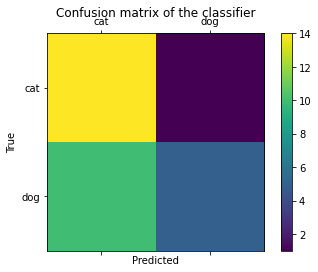

In [17]:
## How Accurate was the Model ... confusion matrix
from sklearn.metrics import confusion_matrix
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
## actual = (TestLabels == 'neg').tolist()
## predict = (Prediction == 'neg').tolist()
y_true = testLabels
y_predict = (Prediction).tolist()
labels =[label1, label2]
cm = confusion_matrix(y_true, y_predict, labels)
print(cm)
### prediction probabilities
## columns are the labels in alphabetical order
## The decinal in the matrix are the prob of being
## that label
#print(np.round(MyModelNB.predict_proba(TestDF),2))
#import matplotlib as plt
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()